In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from mss import mss
from PIL import Image, ImageGrab
import time

In [5]:
#(bbox= x,y,width,height *starts top-left)
raw_image = ImageGrab.grab(bbox=(0,0,1000,510))
img_np = np.array(raw_image) #this is the array obtained from conversion
img = cv2.cvtColor(img_np, cv2.COLOR_BGR2GRAY)
# plt.figure(figsize = (10,5))
# plt.imshow(img, cmap= 'gray')
# plt.show()

In [68]:
img_np = np.array(raw_image) #this is the array obtained from conversion
img_nb = cv2.GaussianBlur(img_np , (5,5),0)
img = cv2.cvtColor(img_nb, cv2.COLOR_BGR2GRAY)

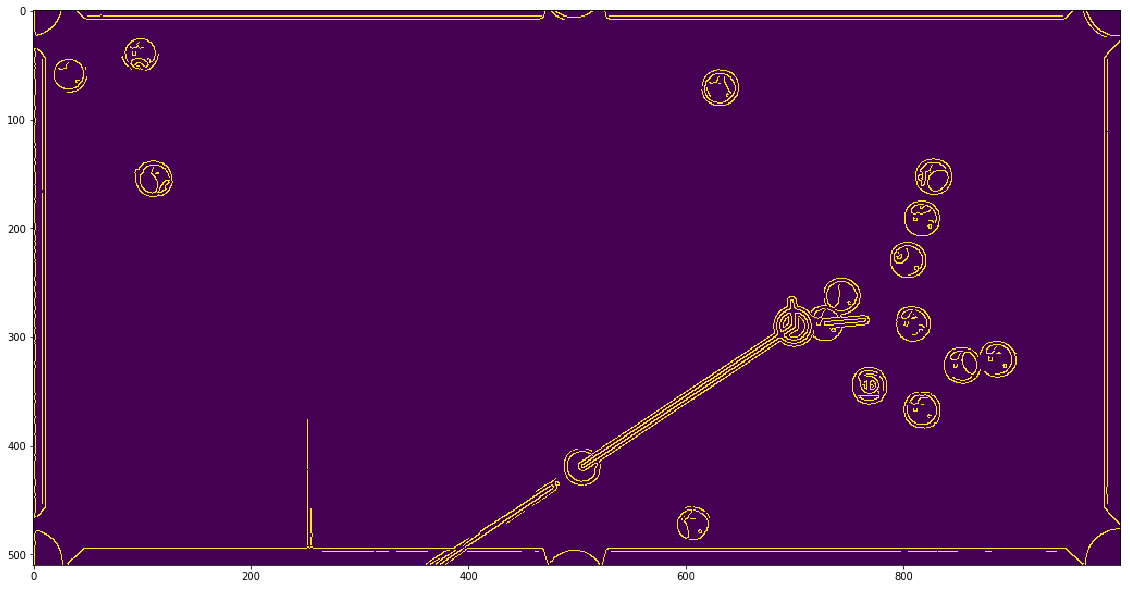

In [112]:
# th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 411, 1)

plt.figure(figsize= (20,10.2))
plt.imshow(edges)
plt.show()

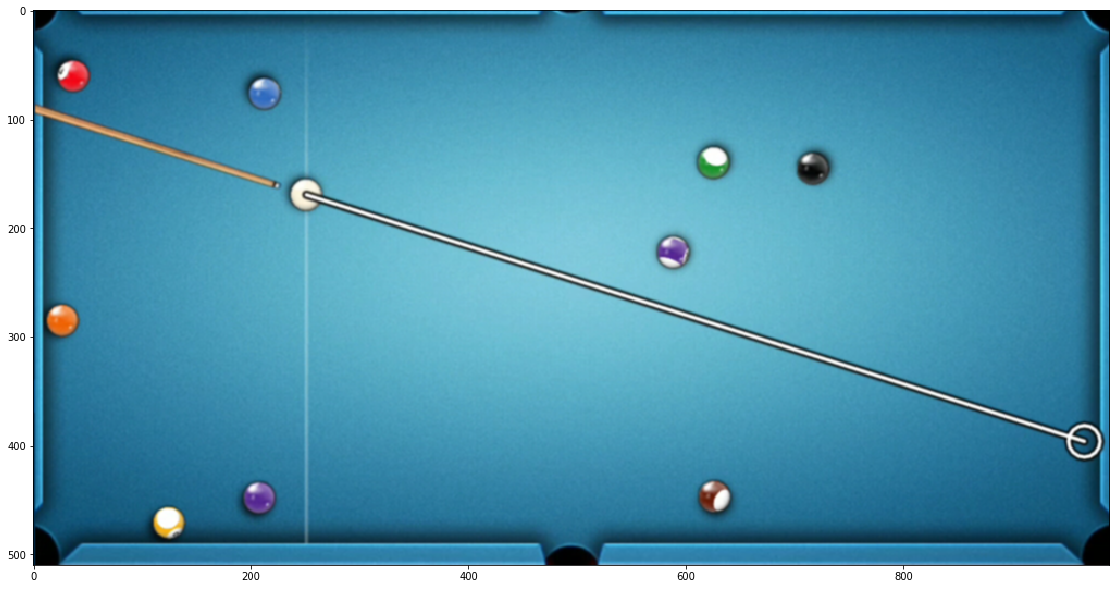

In [12]:
plt.figure(figsize= (20,10.2))
plt.imshow(img_nb)
plt.show()

In [6]:
# YS = 236
# YL = 1006
# XS = 210
# XL = 1708

# XD = XL- XS
# YD = YL - YS

XD = 1000
YD = 510

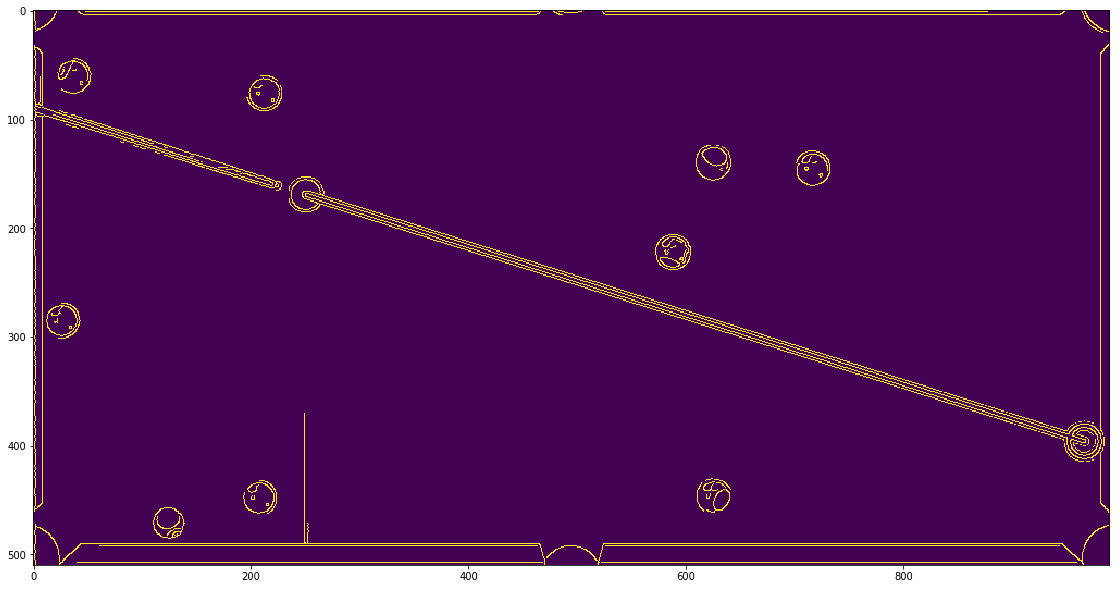

In [18]:
plt.figure(figsize= (20,10.2))
plt.imshow(edges)
plt.show()


In [10]:
for i in range(10,300,10):
    img_np = np.array(raw_image) #this is the array obtained from conversion
    img_nb = cv2.GaussianBlur(img_np , (3,3),0)
    img = cv2.cvtColor(img_np, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(img,i,i+70, apertureSize = 3 )
    # plt.figure(figsize= (20,10.2))
    # plt.imshow(edges)
    # plt.show()
    circles =  cv2.HoughCircles(edges,
                                cv2.HOUGH_GRADIENT,
                                1.5,15,
                                param1=100,
                                param2=30,
                                minRadius=14,
                                maxRadius=17)
    print(i,len(circles[0,:]))

10 6
20 6
30 6
40 6
50 6
60 6
70 7
80 7
90 7
100 8
110 8
120 8
130 8
140 8
150 7
160 6
170 5
180 5
190 6
200 5
210 5
220 5
230 3
240 3
250 3
260 3
270 2
280 3
290 3


In [29]:
img_np = np.array(raw_image) #this is the array obtained from conversion
img_nb = cv2.GaussianBlur(img_np , (3,3),0)
img = cv2.cvtColor(img_np, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img,130,130+70, apertureSize = 3)
lines = cv2.HoughLines(edges, 0.2, np.pi / 180, 200)
print(len(circles[0,:]))

8


In [135]:
circles_small =  cv2.HoughCircles(edges,
                            cv2.HOUGH_GRADIENT,
                            1,20,
                            param1=100,
                            param2=30,
                            minRadius=10,
                            maxRadius=13)
circles_small

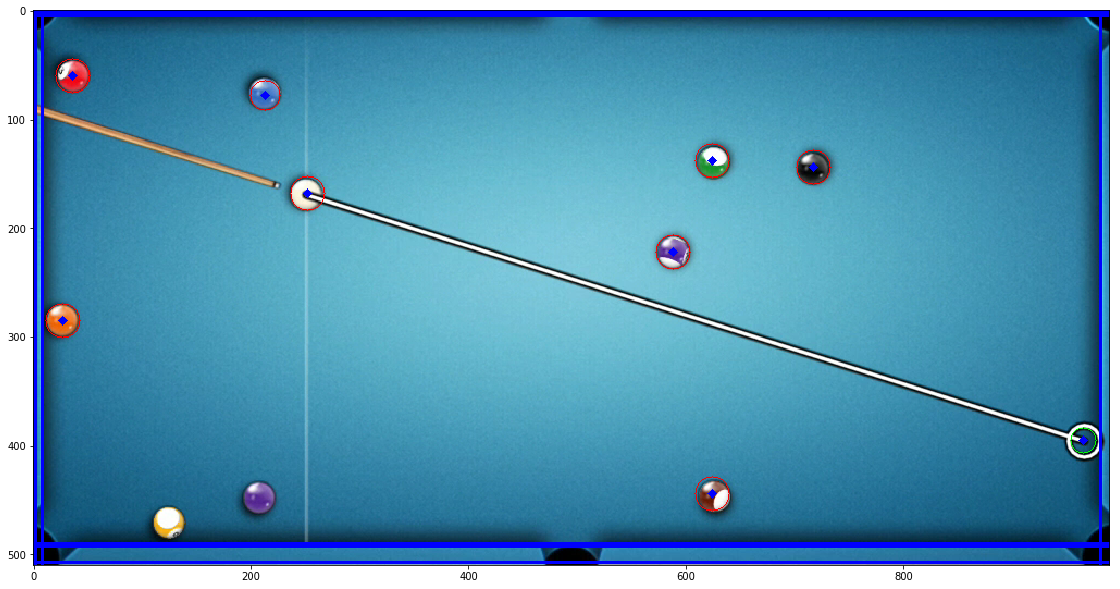

In [30]:
for i in circles[0,:]:
    #    draw    the    outer    circle
    cv2.circle(img_np,(i[0],i[1]),i[2],(255,0,0),1)
    #    draw    the    center    of    the    circle
    cv2.circle(img_np,(i[0],i[1]),2,(0,0,255),3)

for i in circles_small[0,:]:
    #    draw    the    outer    circle
    cv2.circle(img_np,(i[0],i[1]),i[2],(0,255,0),1)
    #    draw    the    center    of    the    circle
    cv2.circle(img_np,(i[0],i[1]),2,(0,0,255),3)
    
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
    x1 = int(x0 + 1000 * (-b))
    # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
    y1 = int(y0 + 1000 * (a))
    # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
    x2 = int(x0 - 1000 * (-b))
    # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
    y2 = int(y0 - 1000 * (a))
    cv2.line(img_np, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.figure(figsize=(20,10.2))
plt.imshow(img_np)
plt.show()

In [73]:
circles

array([[[816.75, 191.25,  16.05],
        [728.25, 287.25,  16.05],
        [698.25, 290.25,  16.05],
        [504.75, 420.75,  16.05],
        [804.75, 228.75,  16.05],
        [828.75, 152.25,  16.05],
        [809.25, 288.75,  16.05],
        [108.75, 153.75,  16.05],
        [855.75, 326.25,  16.05],
        [632.25,  71.25,  16.05],
        [ 33.75,  57.75,  16.05],
        [744.75, 261.75,  16.05],
        [603.75, 471.75,  16.05],
        [ 96.75,  35.25,  16.05],
        [767.25, 342.75,  16.05],
        [819.75, 368.25,  16.05],
        [888.75, 320.25,  16.05]]], dtype=float32)

In [91]:
circles

array([[[804.5, 229.5,  16.4],
        [817.5, 190.5,  16.4],
        [698.5, 289.5,  16.4],
        [744.5, 262.5,  15.3],
        [504.5, 421.5,  16.4],
        [769.5, 345.5,  16.4],
        [809.5, 288.5,  15.3],
        [108.5, 153.5,  15.3],
        [632.5,  68.5,  16.4]]], dtype=float32)

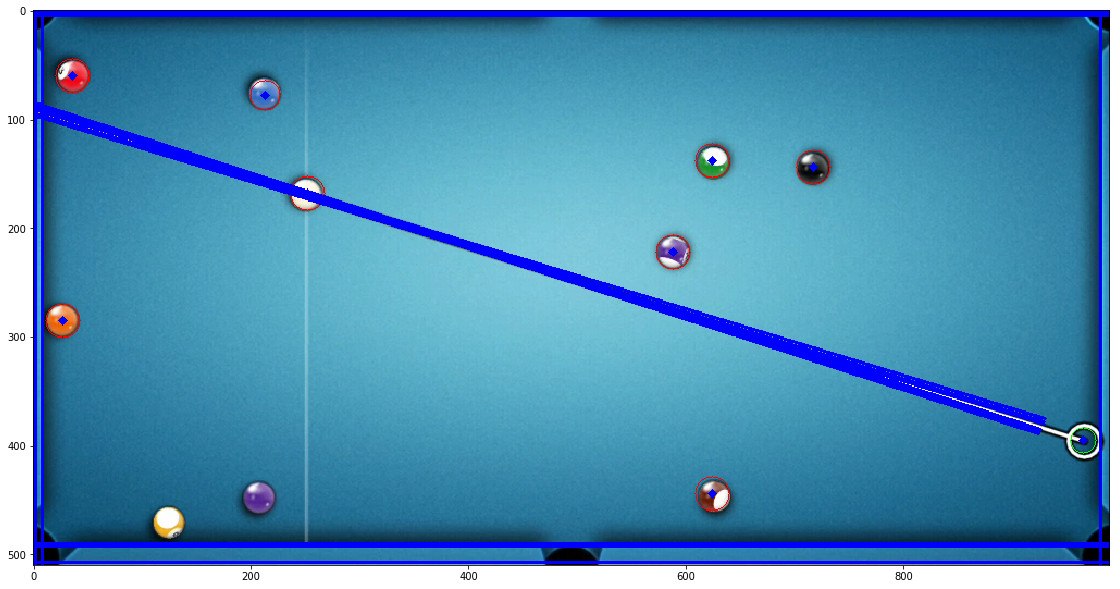

In [335]:
dists = []
for c in circles[0]:
    dists.append(np.linalg.norm(c[:2] - circles_small[0][0][:2]))
dists = np.array(dists)

In [337]:
suitables = np.arange(len(circles[0]))[(dists < 31) & (dists > 28)]
suitables

p1 = circles_small[0][0][:2]
p2 = circles[0][suitables[0]][:2]


kk = (p2[1] - p1[1])/(p2[0] - p1[0])
yy = 0
xx = p2[0] - (p1[1]/kk)

if xx > XD:
    yy = kk*(XD - xx)
    xx = XD

if xx < 0:
    yy = -xx*kk
    xx = 0

yy2 = YD
xx2 = p2[0] - ((p1[1] - YD)/kk)
if xx2 > XD:
    yy2 = YD + kk*(XD - xx2)
    xx2 = XD
if xx2 < 0:
    yy2 = YD - xx2*kk
    xx2 = 0


array([2])

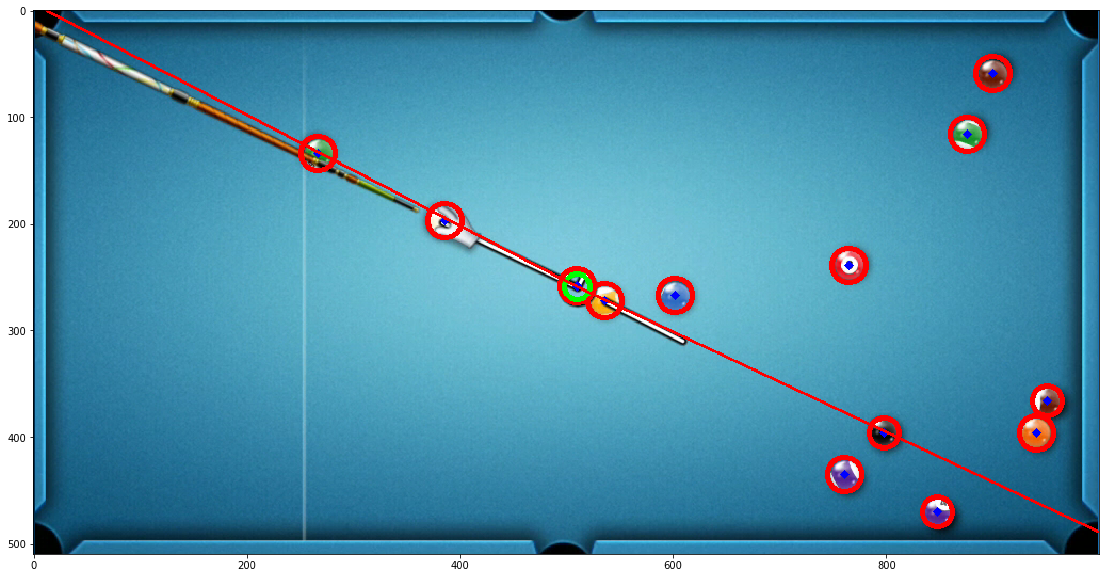

In [340]:
plt.figure(figsize = (20,10))
plt.imshow(img_np, cmap= 'gray')
plt.show()

In [180]:
raw_image = cv2.imread('pool_overlap2.jpg')
raw_image = raw_image[YS:YL,XS:XL]
img = cv2.cvtColor(raw_image, cv2.COLOR_BGR2GRAY)


In [175]:
p1

array([1119.5,  374.5], dtype=float32)

In [339]:
cv2.line(img_np, tuple(p1),(int(round(xx2)),int(round(yy2))),255,2)
# cv2.line(img_np, tuple(p1),(int(xx2+1),int(yy2)),255,2)
# cv2.line(img_np, tuple(p1),(int(xx2),int(yy2 +1)),255,2)
# cv2.line(img_np, tuple(p1),(int(xx2+ 1),int(yy2 +1)),255,2)

cv2.line(img_np, tuple(p1),(int(round(xx)),int(round(yy))),255,2)
# cv2.line(img_np, tuple(p1),(int(xx+1),int(yy)),255,2)
# cv2.line(img_np, tuple(p1),(int(xx),int(yy +1)),255,2)
# cv2.line(img_np, tuple(p1),(int(xx+ 1),int(yy +1)),255,2)
# cv2.line(img_np, touple(p1),(int(xx2),int(yy2)),255,2)

array([[[  0,  45,  79],
        [  0,  45,  79],
        [  0,   1,   0],
        ...,
        [  0,   1,   0],
        [  0,   1,   0],
        [ 24, 112, 181]],

       [[  0,  45,  79],
        [  0,  45,  79],
        [  0,   1,   0],
        ...,
        [  0,   1,   0],
        [  0,   1,   0],
        [ 24, 112, 181]],

       [[  0,  45,  79],
        [  0,  45,  79],
        [  0,   1,   0],
        ...,
        [  0,   1,   0],
        [  0,   1,   0],
        [ 24, 112, 181]],

       ...,

       [[  0,  45,  79],
        [  0,  45,  79],
        [  0,   1,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [ 24, 112, 181]],

       [[  0,  45,  79],
        [  0,  45,  79],
        [  0,   1,   0],
        ...,
        [  0,   1,   0],
        [  1,   0,   0],
        [ 24, 112, 181]],

       [[  0,  45,  79],
        [  0,  45,  79],
        [  0,   1,   0],
        ...,
        [  0,   1,   0],
        [  2,   1,   0],
        [ 24, 112, 181]]

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from mss import mss
from PIL import Image, ImageGrab
import time
XD = 990
YD = 510

raw_image = ImageGrab.grab(bbox=(0,0,XD,YD))
img_np = np.array(raw_image) #this is the array obtained from conversion
img_nb = cv2.GaussianBlur(img_np , (3,3),0)
img = cv2.cvtColor(img_nb, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img_np, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img2,130,130+70, apertureSize = 3)
lines = cv2.HoughLines(edges, 0.2, np.pi / 180, 200)

x0s = []
x1s = []
x2s = []
y0s = []
y1s = []
y2s = []
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0s.append(a * rho)
    y0s.append(b * rho)
    # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
    x1s.append(int(x0 + 1000 * (-b)))
    # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
    y1s.append(int(y0 + 1000 * (a)))
    # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
    x2s.append(int(x0 - 1000 * (-b)))
    # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
    y2s.append(int(y0 - 1000 * (a)))
    

NameError: name 'x0' is not defined

In [59]:
x0s

[-2.1637137e-05,
 -3.934025e-07,
 -2.172456e-05,
 -2.6226832e-07,
 11.0,
 984.0,
 2.0,
 1.0]

In [65]:
y0s,x0s

([495.0, 9.0, 497.0, 6.0, 0.0, 0.0, 0.0, 0.0],
 [-2.1637137e-05,
  -3.934025e-07,
  -2.172456e-05,
  -2.6226832e-07,
  11.0,
  984.0,
  2.0,
  1.0])

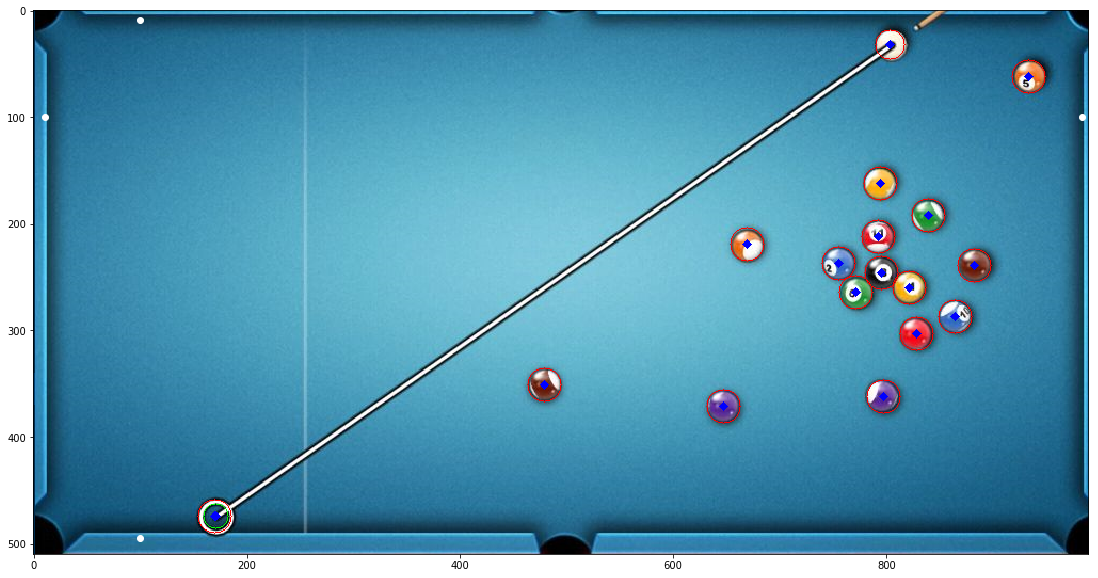

In [7]:
plt.figure(figsize=(20,10))
plt.imshow(img_np)
plt.scatter(984,100, c= 'white')
plt.scatter(11,100, c= 'white')
plt.scatter(100,9, c= 'white')
plt.scatter(100,495, c= 'white')
plt.show()

In [67]:
x0s = np.array(x0s)
x0s[x0s<20].max()

11.0

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from mss import mss
from PIL import Image, ImageGrab
import time
XD = 990
YD = 510

raw_image = ImageGrab.grab(bbox=(0,0,XD,YD))
img_np = np.array(raw_image) #this is the array obtained from conversion
img_nb = cv2.GaussianBlur(img_np , (3,3),0)
img = cv2.cvtColor(img_nb, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img_np, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img2,130,130+70, apertureSize = 3)
lines = cv2.HoughLines(edges, 0.2, np.pi / 180, 200)

# x0s = []
# x1s = []
# x2s = []
# y0s = []
# y1s = []
# y2s = []
# for line in lines:
#     rho,theta = line[0]
#     a = np.cos(theta)
#     b = np.sin(theta)
#     x0s.append(a * rho)
#     y0s.append(b * rho)
#     # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
#     x1s.append(int(x0 + 1000 * (-b)))
#     # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
#     y1s.append(int(y0 + 1000 * (a)))
#     # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
#     x2s.append(int(x0 - 1000 * (-b)))
#     # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
#     y2s.append(int(y0 - 1000 * (a)))

# x0s = np.array(x0s)
# xa = x0s[x0s<20].max()
# y0s = np.array(y0s)

while 1:
    #(bbox= x,y,width,height *starts top-left)
    raw_image = ImageGrab.grab(bbox=(0,0,XD,YD))
    img_np = np.array(raw_image) #this is the array obtained from conversion
    img_nb = cv2.GaussianBlur(img_np , (3,3),0)
    img = cv2.cvtColor(img_nb, cv2.COLOR_BGR2GRAY)
    
    circles_small =  cv2.HoughCircles(img,
                            cv2.HOUGH_GRADIENT,
                            0.9,20,
                            param1=100,
                            param2=30,
                            minRadius=10,
                            maxRadius=13)
    circles =  cv2.HoughCircles(img,
                            cv2.HOUGH_GRADIENT,
                            1.5,15,
                            param1=100,
                            param2=30,
                            minRadius=14,
                            maxRadius=17)

    try:
        if (len(circles_small) == 0) | ((len(circles) == 0)):
            time.sleep( .5)
            state = True
            cv2.imshow('test', img_np)
            if cv2.waitKey(25) & 0xFF == ord('q'):
                cv2.destroyAllWindows()
                break
            continue
    except:
        time.sleep(0.5)
        state = True
        cv2.imshow('test', img_np)
        if cv2.waitKey(25) & 0xFF == ord('q'):
            cv2.destroyAllWindows()
            break
        continue

    for i in circles[0,:]:
        #    draw    the    outer    circle
        cv2.circle(img_np,(i[0],i[1]),i[2],(255,0,0),1)
        #    draw    the    center    of    the    circle
        cv2.circle(img_np,(i[0],i[1]),2,(0,0,255),3)

    for i in circles_small[0,:]:
        #    draw    the    outer    circle
        cv2.circle(img_np,(i[0],i[1]),i[2],(0,255,0),1)
        #    draw    the    center    of    the    circle
        cv2.circle(img_np,(i[0],i[1]),2,(0,0,255),3)
    for line in lines:
        rho,theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
        x1 = int(x0 + 1000 * (-b))
        # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
        y1 = int(y0 + 1000 * (a))
        # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
        x2 = int(x0 - 1000 * (-b))
        # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
        y2 = int(y0 - 1000 * (a))
#         cv2.line(img_np, (x1, y1), (x2, y2), (0, 0, 255), 2)
    
    dists = []
    for c in circles[0]:
        dists.append(np.linalg.norm(c[:2] - circles_small[0][0][:2]))
    dists = np.array(dists)
    
    suitables = np.arange(len(circles[0]))[(dists < 33) & (dists > 27)]
    if len(suitables) == 0:
        time.sleep(0.2)
        cv2.imshow('test', img_np)
        if cv2.waitKey(25) & 0xFF == ord('q'):
            cv2.destroyAllWindows()
            break
        continue
    
    p1 = circles_small[0][0][:2]
    p2 = circles[0][suitables[0]][:2]
    
    if p2[0] == p1[0]:
        time.sleep(0.2)
        cv2.imshow('test', img_np)
        if cv2.waitKey(25) & 0xFF == ord('q'):
            cv2.destroyAllWindows()
            break
        continue

    kk = (p2[1] - p1[1])/(p2[0] - p1[0])
    yy = 0
    xx = p2[0] - (p1[1]/kk)

    if xx > XD:
        yy = kk*(XD - xx)
        xx = XD

    if xx < 0:
        yy = -xx*kk
        xx = 0

    yy2 = YD
    xx2 = p2[0] - ((p1[1] - YD)/kk)
    if xx2 > XD:
        yy2 = YD + kk*(XD - xx2)
        xx2 = XD
    if xx2 < 0:
        yy2 = YD - xx2*kk
        xx2 = 0
    
    cv2.line(img_np, tuple(p1),(int(round(xx)),int(round(yy))),255,2)
    cv2.line(img_np, tuple(p1),(int(round(xx2)),int(round(yy2))),255,2)
    cv2.imshow('test', img_np)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break